                            open   high  close    low  hour_return  \
date                                                                 
2021-10-28 14:00:00+07:00  183.9  184.3  183.9  183.9     0.000000   
2021-10-28 13:00:00+07:00  183.2  184.8  183.9  180.7     0.382096   
2021-10-28 12:00:00+07:00  181.4  183.8  183.2  181.3     0.992282   
2021-10-28 11:00:00+07:00  182.2  183.6  181.4  181.1    -0.439078   
2021-10-28 10:00:00+07:00  181.7  183.1  182.1  181.4     0.220143   
...                          ...    ...    ...    ...          ...   
2021-09-28 17:00:00+07:00  145.8  146.7  145.9  144.7     0.068587   
2021-09-28 16:00:00+07:00  146.3  146.9  145.7  145.2    -0.410116   
2021-09-28 15:00:00+07:00  145.1  146.9  146.2  144.1     0.758098   
2021-09-28 14:00:00+07:00  145.8  146.4  145.1  143.8    -0.480110   
2021-09-28 13:00:00+07:00  146.7  147.0  145.8  144.8    -0.613497   

                                  day  hour  type  type_continuous  
date                

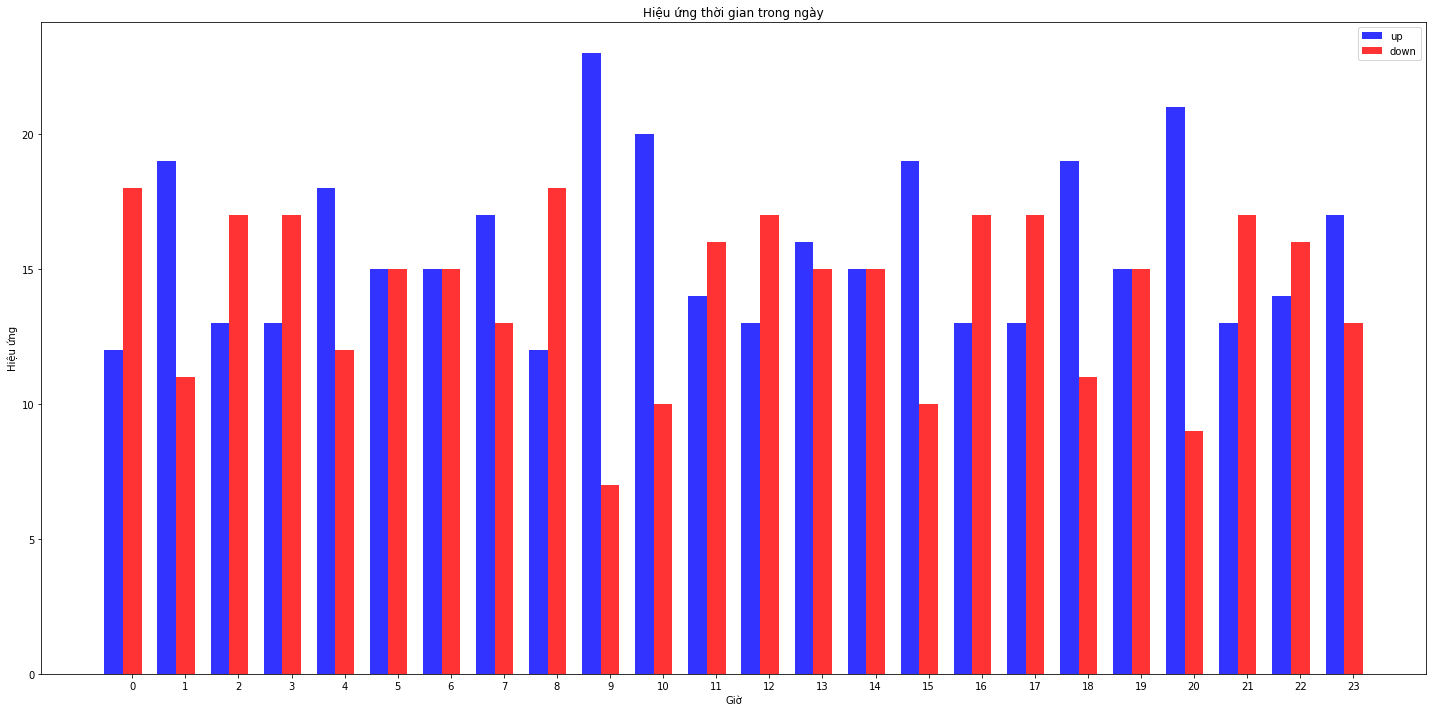

In [1]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*30, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)

data_prices['type_continuous'] = type_continuous(data_prices)

# data_prices = data_prices[data_prices['hour'] == 10]

# number_up = len(data_prices[data_prices['type'] == 'up'])
# number_down = len(data_prices[data_prices['type'] == 'down'])

# print(number_up)
# print(number_down)

print(data_prices)

bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


# x = data_prices[data_prices['hour'] == 13]


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]
    # print(f"Giờ {i}")
    # print("________________________________")
    # print(data_prices_x[data_prices_x['type'] == 'up']['hour_return'].describe())
    # print("+++")
    # print(data_prices_x[data_prices_x['type'] == 'down']['hour_return'].describe())
    # data_prices[data_prices['hour'] == i]['hour_return'].plot(figsize=[20,10], legend=True, linestyle='--', marker='o')


    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()






In [20]:
data_prices.iloc[0].type

'up'

Giờ 20
________________________________
count    21.000000
mean      1.011914
std       0.698796
min       0.110497
25%       0.410046
50%       0.891021
75%       1.534829
max       2.459445
Name: hour_return, dtype: float64
21.250204142071667
+++
count    9.000000
mean    -0.730645
std      1.048788
min     -3.314607
25%     -0.615700
50%     -0.387168
75%     -0.103573
max     -0.061200
Name: hour_return, dtype: float64
-6.575805464101907


<AxesSubplot:xlabel='date'>

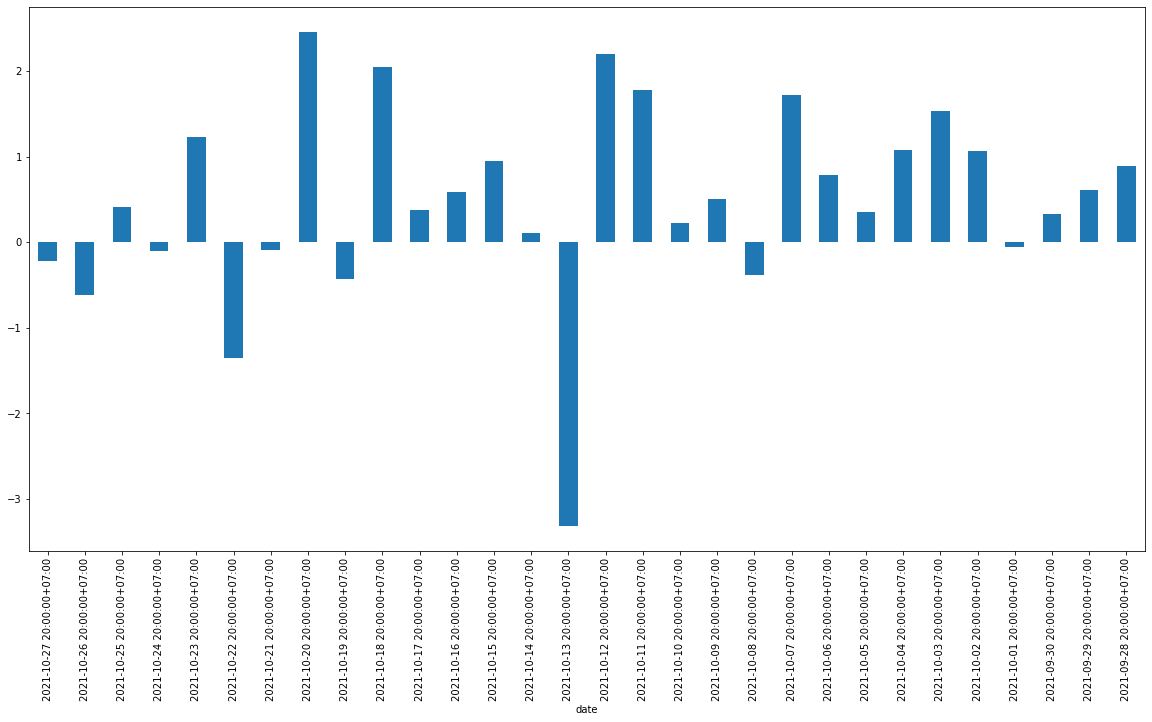

In [11]:
hour_observe = 20

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')
# data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

<AxesSubplot:>

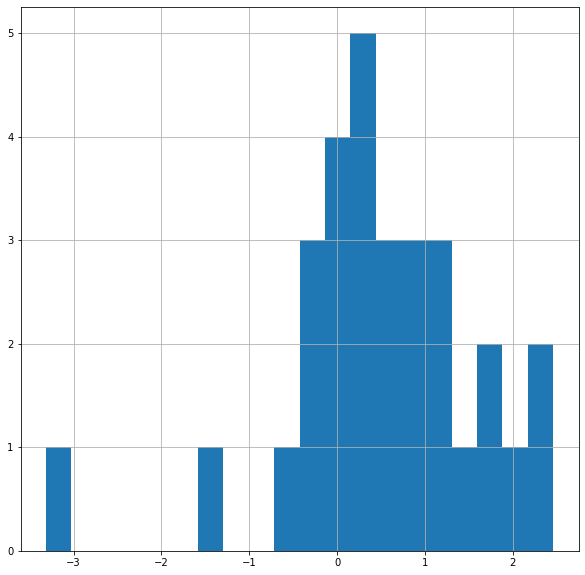

In [12]:
data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

In [13]:
data_prices[data_prices['hour_return']==data_prices['hour_return'].max()]


,open,high,close,low,hour_return,day,hour,type,highest_in_day
date,,,,,,,,,
2021-10-06 19:00:00+07:00,166.6,177.8,177.1,166.4,6.302521,2021-10-06,19,up,19


In [14]:
def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()



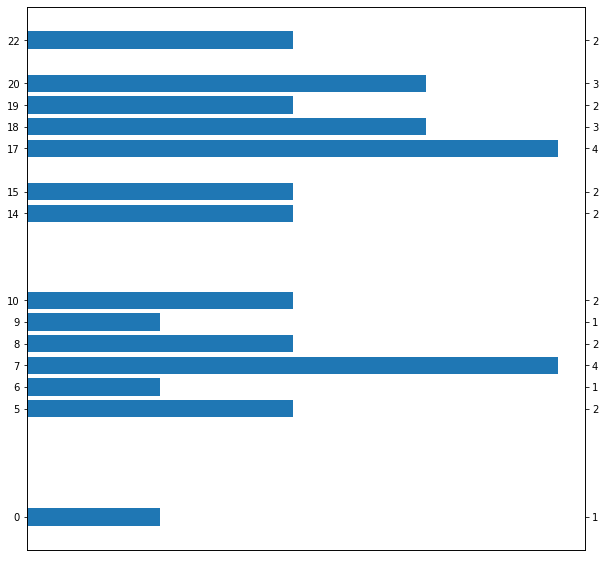

In [15]:

list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()




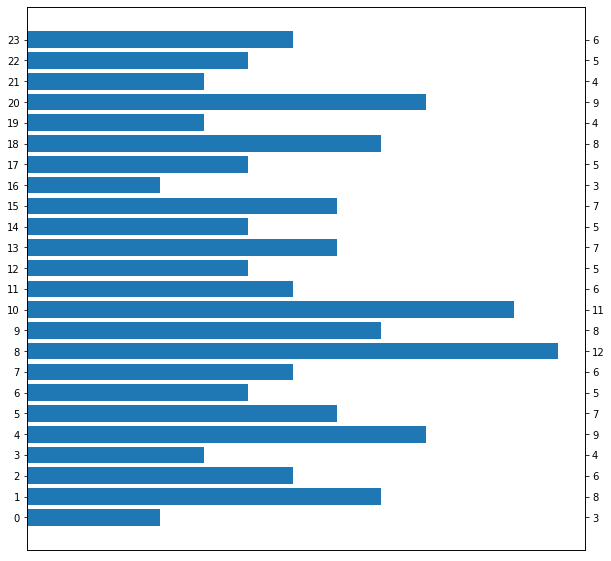

In [16]:
hour_observe = 8
type_observe = 'up'

data_prices_h7 = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == type_observe)]

hour_correlate = {
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0,
    '10': 0,
    '11': 0,
    '12': 0,
    '13': 0,
    '14': 0,
    '15': 0,
    '16': 0,
    '17': 0,
    '18': 0,
    '19': 0,
    '20': 0,
    '21': 0,
    '22': 0,
    '23': 0
}

for value in data_prices_h7['day'].to_list():
    for i in np.arange(24):
        if i == hour_observe:
            continue;
        hour_type = data_prices[(data_prices['day']  == value) & (data_prices['hour'] == i)].type

        if hour_type.values.size > 0 and hour_type.values == [type_observe]:
            hour_correlate[f"{i}"] = hour_correlate[f"{i}"] + 1
            
hour_correlate[f"{hour_observe}"] = len(data_prices_h7)

list_hours = [int(hour) for hour in hour_correlate.keys()]
list_correlate = hour_correlate.values()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_correlate, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_correlate)

plt.show()

